<a href="https://colab.research.google.com/github/Nyamu007/Completed-Projects/blob/main/aug9speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Aug  9 09:34:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

In [5]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
from google.colab import userdata
ROBOFLOW_API = userdata.get('ROBOFLOW_API')

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RdJoHWKE15hA0Lq3QRX3")
project = rf.workspace("road-safety").project("speed-bump-tonyt")
version = project.version(3)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Speed-Bump--3 in yolov12:: 100%|██████████| 4492/4492 [00:00<00:00, 4614.99it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['speed bump']

roboflow:
  workspace: road-safety
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
pip install ultralytics roboflow torch torchvision --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.

In [12]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=30)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Speed-Bump--3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=

Overriding model.yaml nc=2 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       232  ultralytics.nn.modules.conv.Conv             [3, 8, 3, 1]                  
  1                  -1  1      1184  ultralytics.nn.modules.conv.Conv             [8, 16, 3, 2]                 
  2                  -1  1      1248  ultralytics.nn.modules.block.C3              [16, 16, 1]                   
  3                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  4                  -1  2      7424  ultralytics.nn.modules.block.C3              [32, 32, 2]                   
  5                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  6                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  7                  -1  1     73984  ultralytics.

YOLOv12s summary: 149 layers, 776,603 parameters, 776,587 gradients, 9.9 GFLOPs

Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.0±8.5 MB/s, size: 40.4 KB)


train: Scanning /content/Speed-Bump--3/train/labels... 1927 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1927/1927 [00:02<00:00, 784.62it/s]

train: New cache created: /content/Speed-Bump--3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2268. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.7±11.1 MB/s, size: 42.4 KB)


val: Scanning /content/Speed-Bump--3/valid/labels... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<00:00, 629.26it/s]

val: New cache created: /content/Speed-Bump--3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 67 weight(decay=0.0), 74 weight(decay=0.0005), 73 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.89G      3.819      4.287      3.938         29        640: 100%|██████████| 121/121 [00:45<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        217        245   0.000973        0.2    0.00079   0.000176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.33G      2.966       3.83      3.179         21        640: 100%|██████████| 121/121 [00:43<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


                   all        217        245     0.0472      0.151     0.0228    0.00447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.33G       2.61      3.434      2.849         22        640: 100%|██████████| 121/121 [00:43<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        217        245     0.0529      0.118     0.0162    0.00269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.34G      2.529      3.196       2.72         25        640: 100%|██████████| 121/121 [00:42<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        217        245     0.0915       0.18     0.0484     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.34G      2.414      3.008       2.62         16        640: 100%|██████████| 121/121 [00:43<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        217        245       0.16       0.18      0.103     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.35G      2.349      2.848      2.569         18        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        217        245      0.237      0.224      0.138     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.36G      2.281      2.691      2.492         20        640: 100%|██████████| 121/121 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        217        245      0.218      0.287      0.145     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.36G      2.251       2.62      2.458         11        640: 100%|██████████| 121/121 [00:43<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        217        245      0.225      0.322      0.169     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.36G      2.211      2.566      2.404         26        640: 100%|██████████| 121/121 [00:44<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        217        245      0.315      0.273      0.182      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.37G      2.166      2.483      2.369         14        640: 100%|██████████| 121/121 [00:43<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        217        245      0.326      0.343       0.24     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.38G      2.129      2.418      2.334         16        640: 100%|██████████| 121/121 [00:44<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        217        245      0.375      0.392      0.312     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.38G      2.073      2.322      2.291         12        640: 100%|██████████| 121/121 [00:43<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        217        245      0.378      0.298      0.235      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.38G      2.047      2.295      2.268         16        640: 100%|██████████| 121/121 [00:44<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        217        245      0.388      0.267       0.24     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.39G      2.002      2.204      2.219         10        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        217        245      0.426      0.445      0.362      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.39G      1.982      2.151       2.22         16        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        217        245      0.452      0.437      0.406      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       4.4G      1.973      2.106      2.186         17        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        217        245      0.473      0.441       0.39      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       4.4G      1.965       2.06      2.168         17        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        217        245      0.508      0.465      0.442      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.41G      1.919      2.029      2.153         19        640: 100%|██████████| 121/121 [00:43<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        217        245      0.443      0.493      0.438      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.41G      1.914      1.988      2.128         17        640: 100%|██████████| 121/121 [00:43<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        217        245      0.519      0.506      0.438      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.42G      1.875      1.929      2.093         27        640: 100%|██████████| 121/121 [00:43<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        217        245      0.542      0.527      0.501       0.17


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.42G      2.158      1.899      1.971          9        640: 100%|██████████| 121/121 [00:43<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        217        245      0.549      0.522      0.502      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.43G       2.12      1.778      1.907          7        640: 100%|██████████| 121/121 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        217        245      0.637      0.502      0.534       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.44G      2.105      1.728       1.88          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        217        245       0.61      0.563      0.553      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.44G      2.021      1.661      1.849          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        217        245       0.63      0.502      0.578      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.45G      2.031      1.629      1.832          9        640: 100%|██████████| 121/121 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        217        245      0.601      0.584       0.58      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.45G      2.002       1.57      1.797          7        640: 100%|██████████| 121/121 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        217        245      0.585      0.576      0.582      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.46G      1.977      1.538      1.801          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]

                   all        217        245      0.622      0.557      0.569       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.46G      1.955      1.514      1.791          8        640: 100%|██████████| 121/121 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        217        245      0.606       0.59       0.59      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.46G      1.957       1.49      1.781          8        640: 100%|██████████| 121/121 [00:42<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        217        245      0.668      0.629      0.641      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.47G       1.93      1.474      1.752          7        640: 100%|██████████| 121/121 [00:42<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        217        245      0.638      0.629      0.647      0.264



30 epochs completed in 0.383 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 2.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 2.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 82 layers, 773,715 parameters, 0 gradients, 9.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


                   all        217        245      0.642      0.629      0.647      0.265
Speed: 0.4ms preprocess, 4.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train


In [22]:
!ls yolov12s.yaml  # Colab/Jupyter

yolov12s.yaml


In [23]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2420.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2421.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2422.jpg  weights


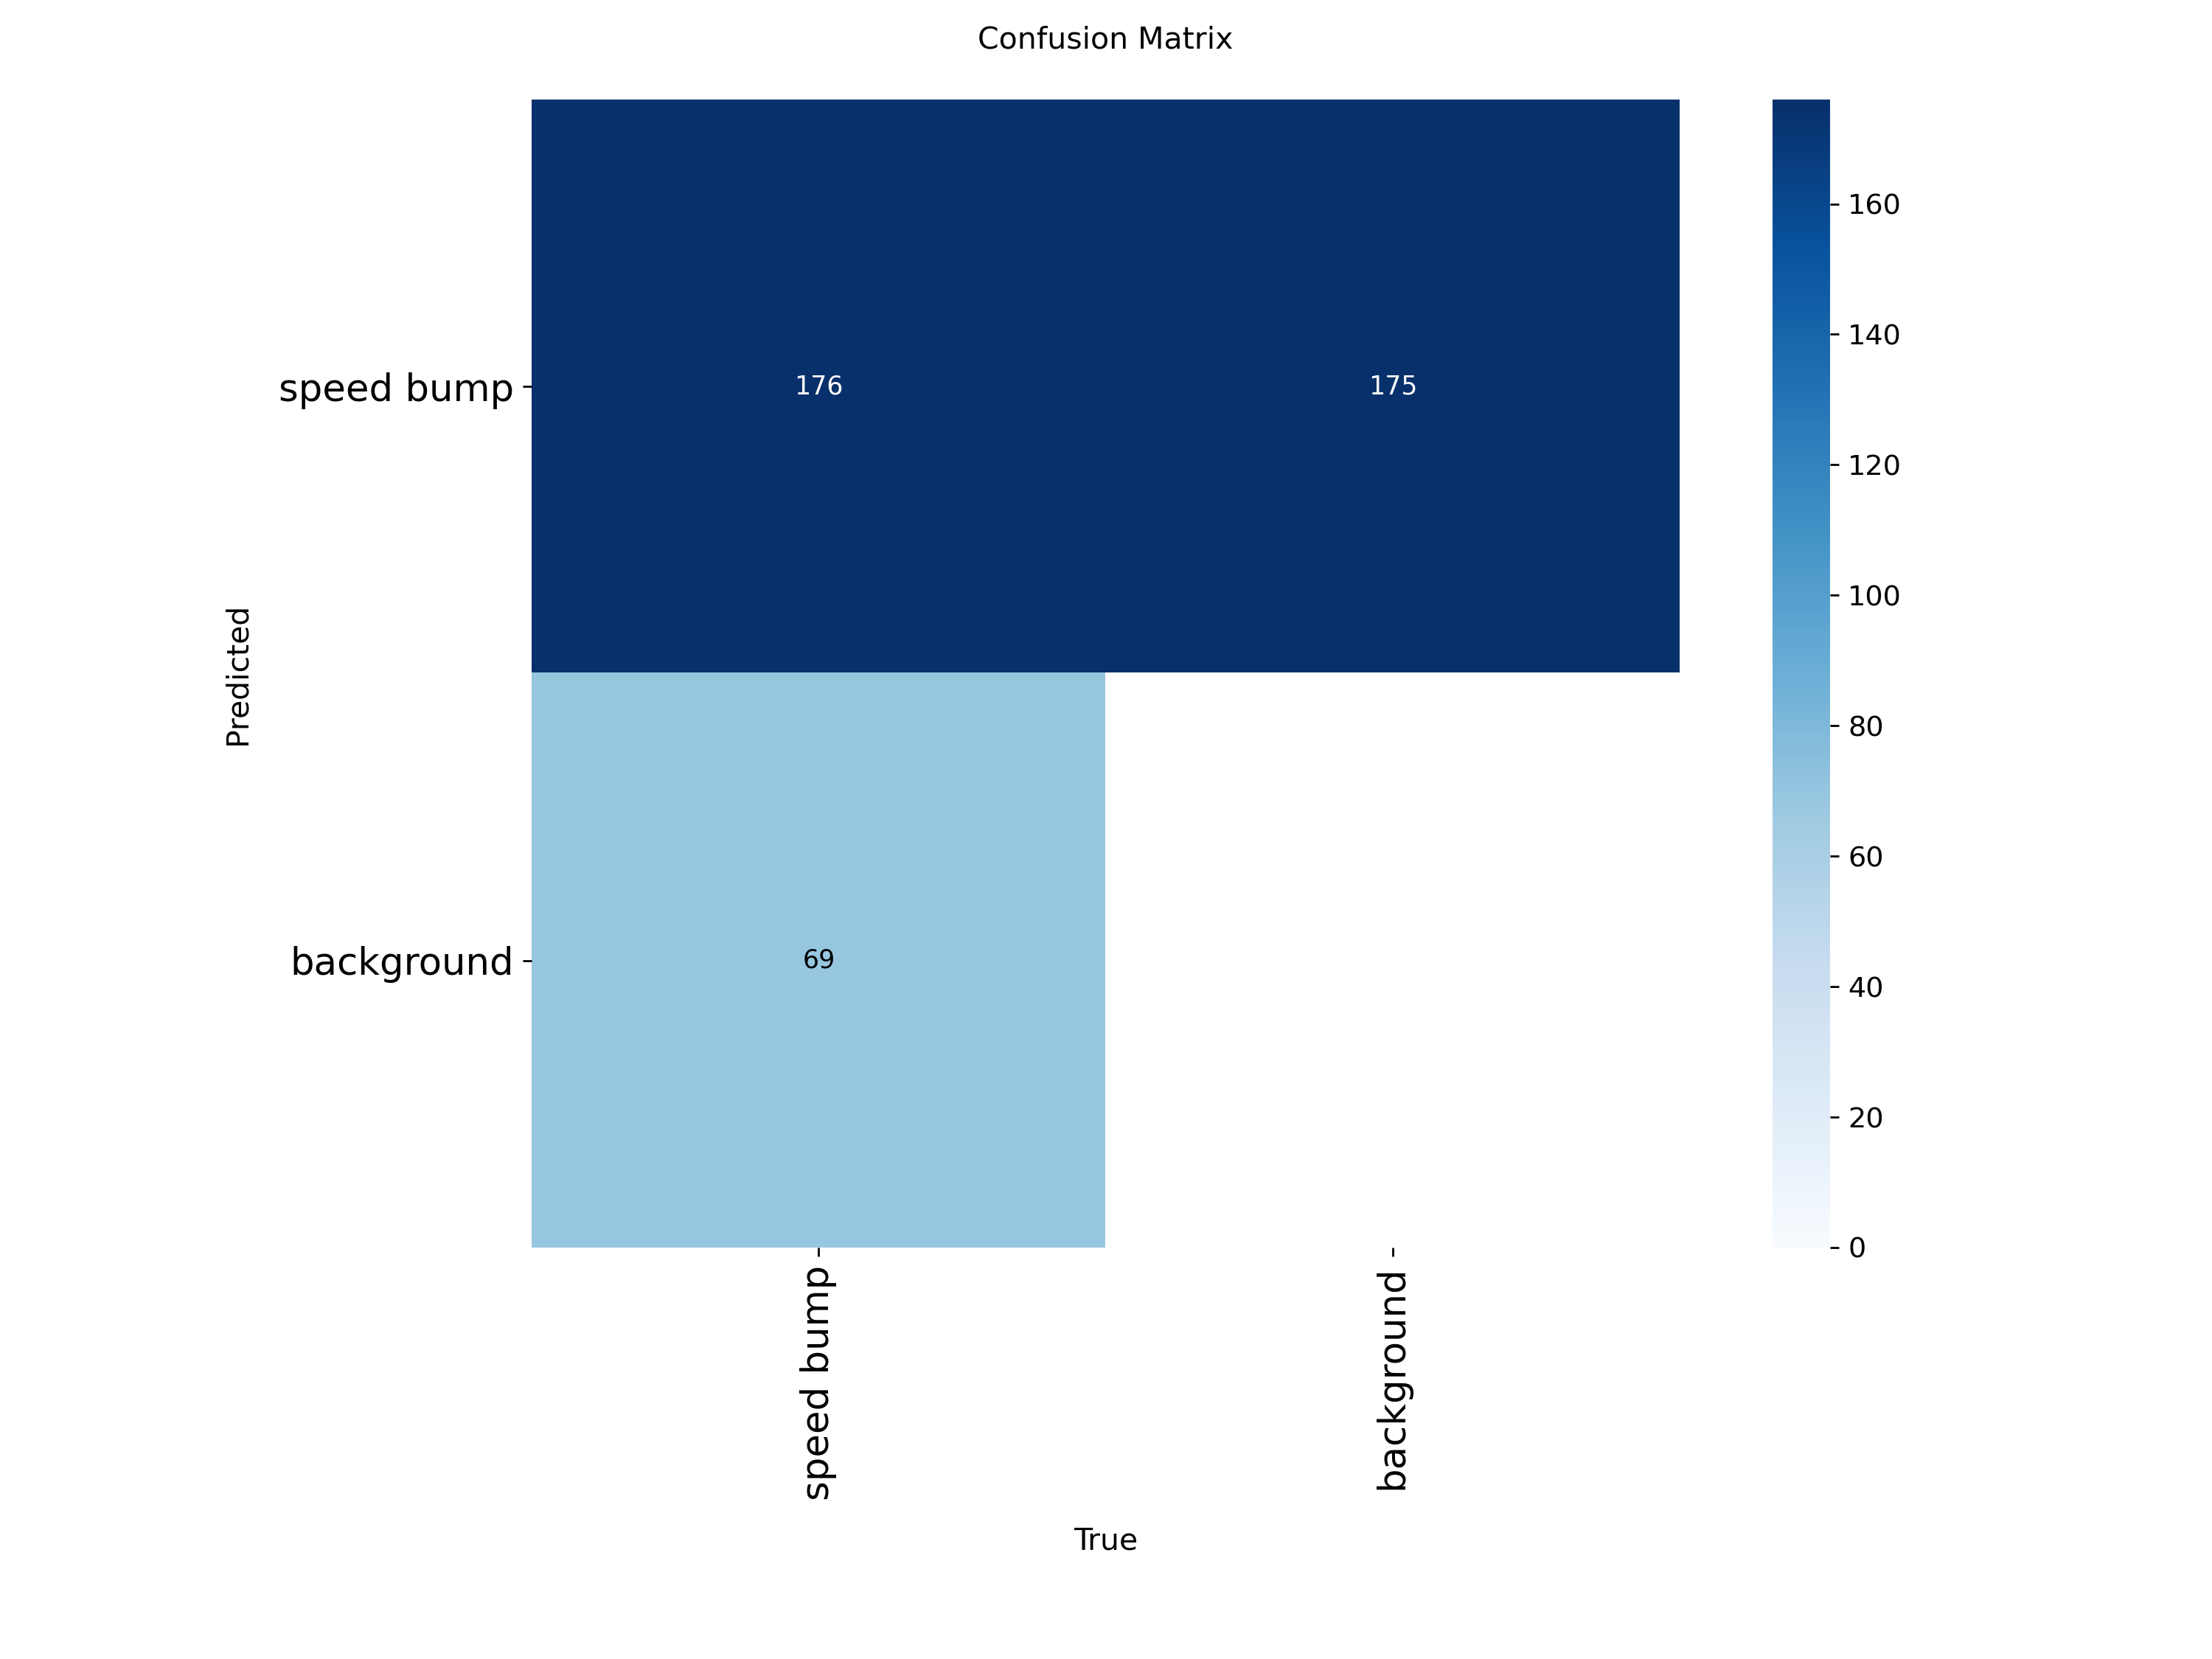

In [24]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

In [25]:

import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2420.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2421.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2422.jpg  weights


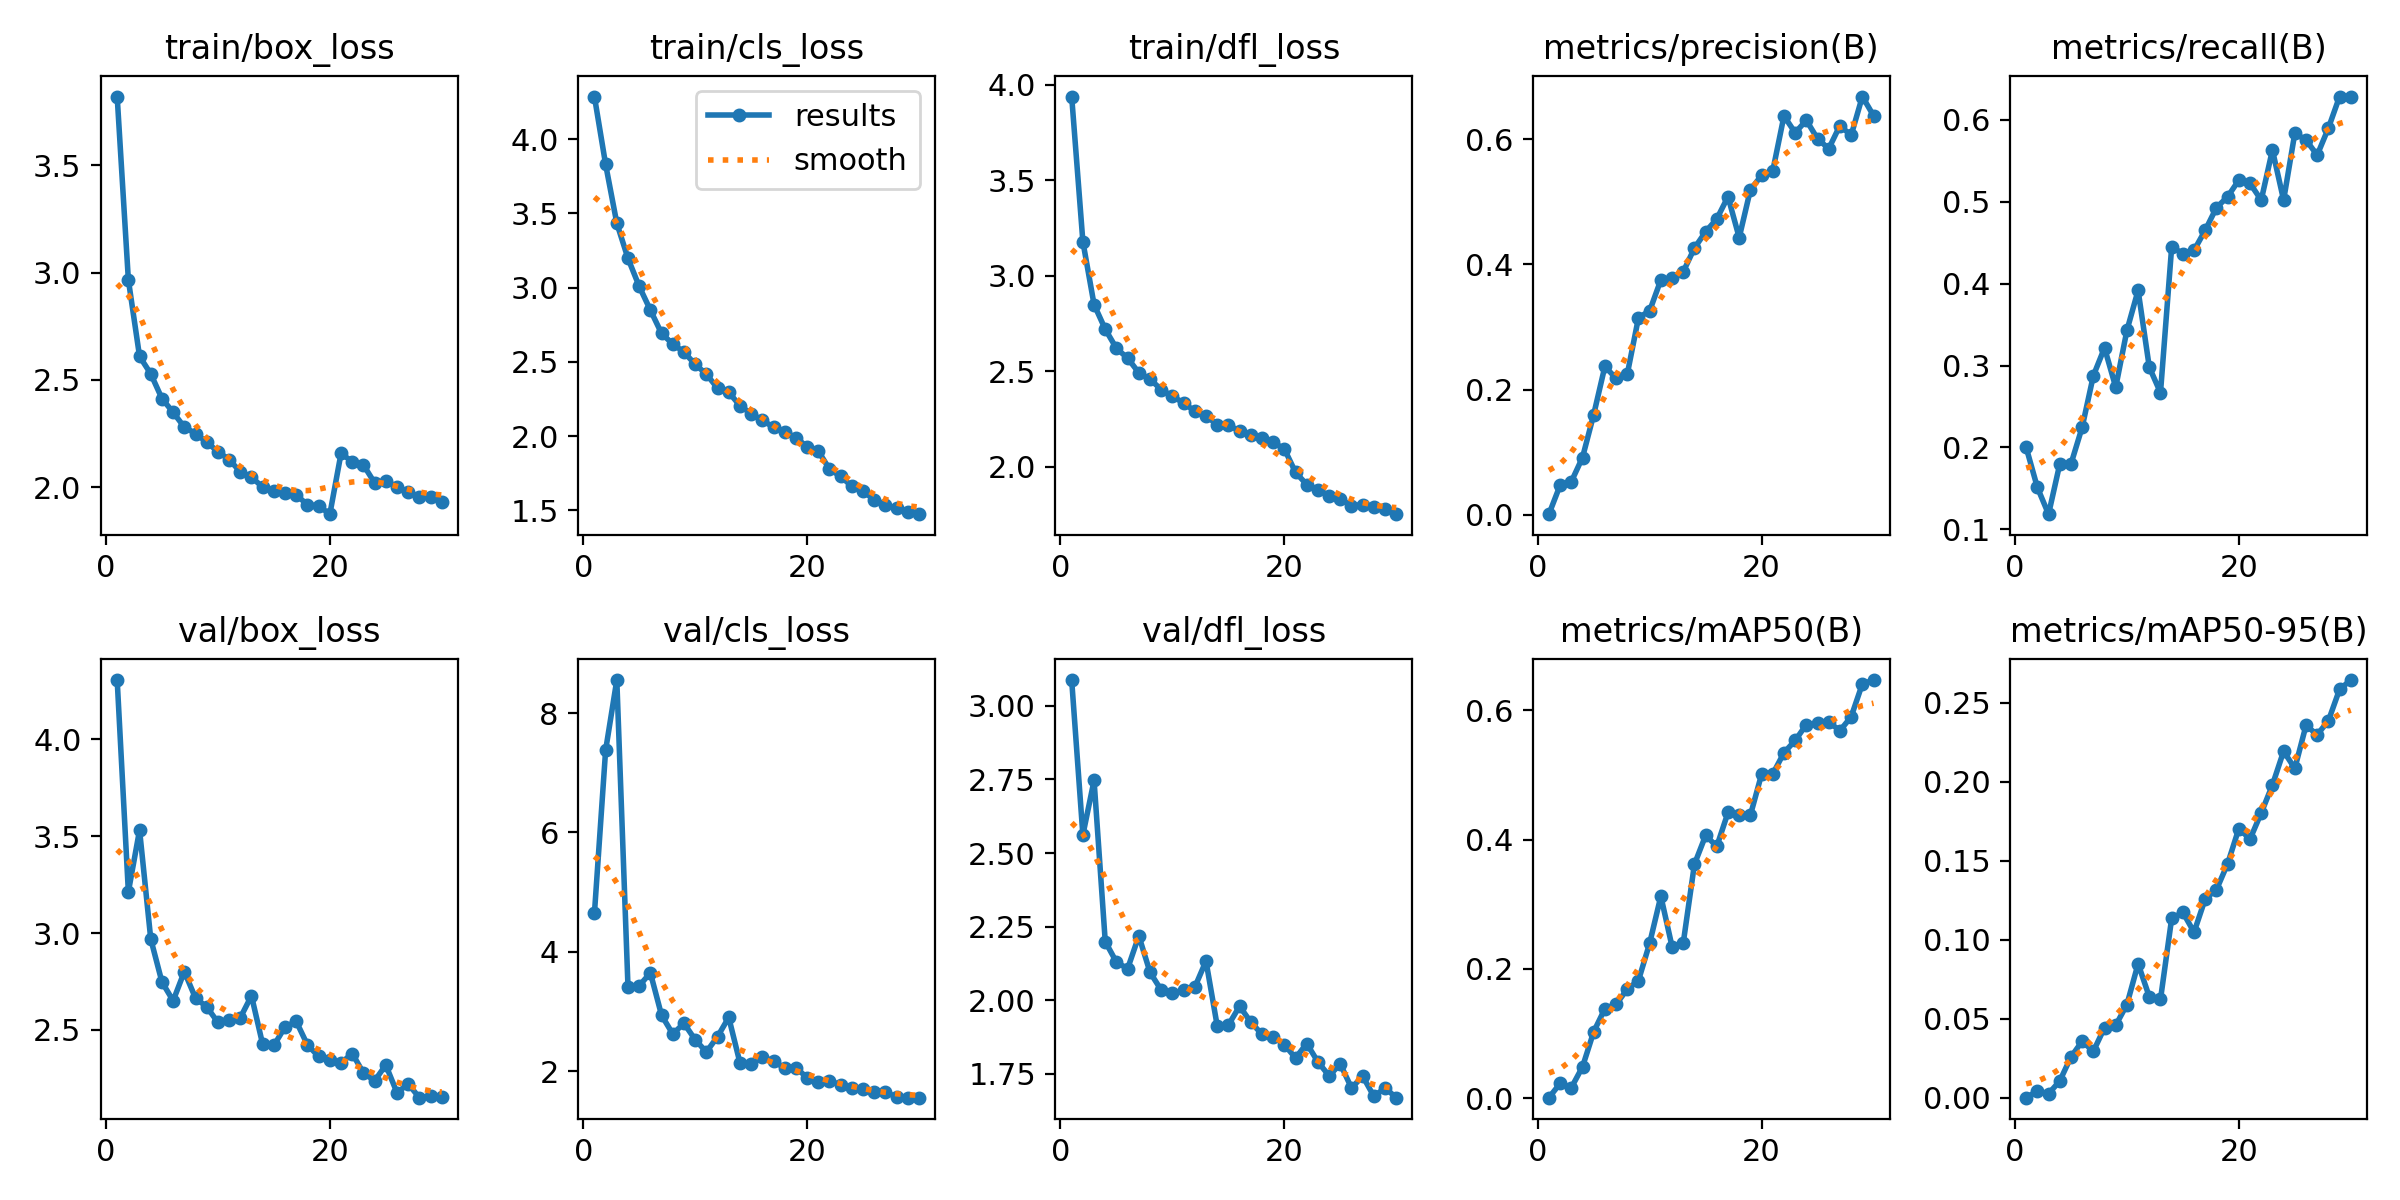

In [26]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [27]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['speed bump']

In [28]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [29]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.2719245268737135
mAP 50 0.7210454968636557
mAP 75 0.102996084390707


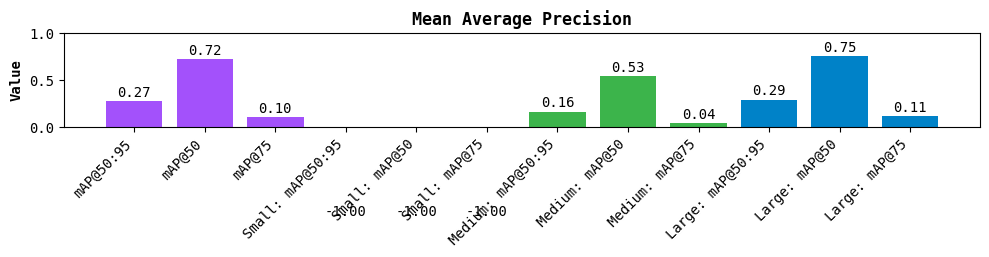

In [30]:
map.plot()

In [35]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml")

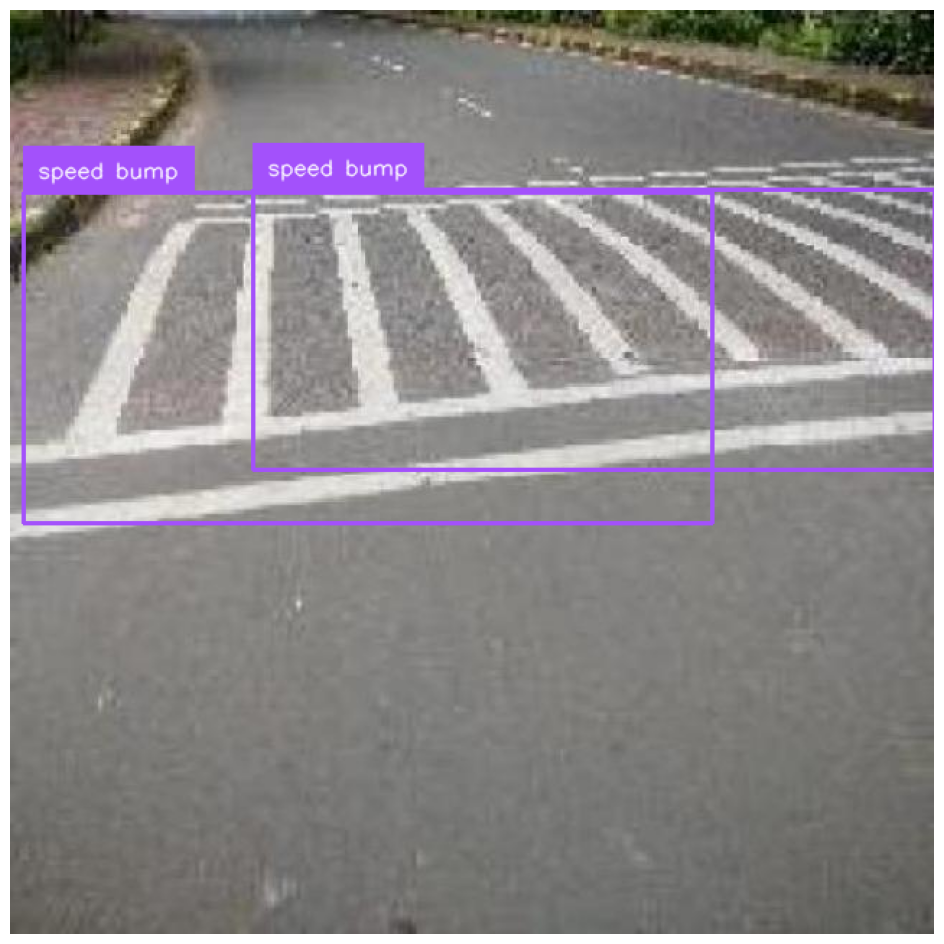

In [36]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [38]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files

# 1. Set up paths
SOURCE_VIDEO_PATH = "/content/t.mp4"
TARGET_VIDEO_PATH = "/content/tannotated.mp4"
MODEL_PATH = "/content/yolo11n.pt"  # adjust if needed

# 2. Load video frames and info
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Initialize BoxAnnotator
box_annotator = sv.BoxAnnotator(
    thickness=2,
    color_lookup=sv.ColorLookup.CLASS
)

# 4. Load YOLOv8 model
model = YOLO(MODEL_PATH)

# 5. Annotate and write video
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processing video"):
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)

        # Filter only class 0 (Potholes)
        pothole_detections = detections[detections.class_id == 0]

        # Annotate bounding boxes
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=pothole_detections
        )

        # (Optional) Add confidence labels manually
        for detection, confidence in zip(pothole_detections.xyxy, pothole_detections.confidence):
            x1, y1, _, _ = map(int, detection)
            label = f"speed bump {confidence:.2f}"
            cv2.putText(
                annotated_frame,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

        sink.write_frame(annotated_frame)

print(f"\n✅ Processing complete! Output saved to {TARGET_VIDEO_PATH}")

# 6. Download video (Colab only)
files.download(TARGET_VIDEO_PATH)

Processing video:   0%|          | 0/1013 [00:00<?, ?it/s]


TypeError: 'MeanAveragePrecisionResult' object is not callable

In [39]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm
import cv2
from google.colab import files
import numpy as np

# 1. Configuration (MODIFY THESE)
SOURCE_VIDEO_PATH = "/content/t.mp4"
TARGET_VIDEO_PATH = "/content/speedbump_annotated.mp4"
MODEL_PATH = "/content/yolo11n.pt"  # or your trained model
CONFIDENCE_THRESHOLD = 0.5  # Minimum detection confidence
SPEEDBUMP_CLASS_ID = 0  # Verify this matches your model

# 2. Initialize components
model = YOLO(MODEL_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# 3. Custom annotators (RED boxes with white text)
box_annotator = sv.BoxAnnotator(
    color=sv.Color(r=255, g=0, b=0),  # Pure red
    thickness=3  # Thicker boxes
)

label_annotator = sv.LabelAnnotator(
    text_color=sv.Color(255, 255, 255),  # White text
    text_scale=0.6,
    text_thickness=1,
    text_padding=5
)

# 4. Processing pipeline
with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Detecting Speed Bumps"):

        # Run inference
        results = model(frame, imgsz=640, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)

        # Filter speed bumps only
        speedbump_detections = detections[
            (detections.class_id == SPEEDBUMP_CLASS_ID) &
            (detections.confidence > CONFIDENCE_THRESHOLD)
        ]

        # Create labels with confidence
        labels = [
            f"SPEEDBUMP {confidence:.2f}"
            for confidence in speedbump_detections.confidence
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(
            scene=frame.copy(),
            detections=speedbump_detections
        )
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=speedbump_detections,
            labels=labels
        )

        sink.write_frame(annotated_frame)

# 5. Results
print(f"\n✅ Success! Annotated video saved to {TARGET_VIDEO_PATH}")
print(f"Total frames processed: {video_info.total_frames}")
files.download(TARGET_VIDEO_PATH)  # Auto-download in Colab

Detecting Speed Bumps: 100%|██████████| 1013/1013 [00:19<00:00, 51.15it/s]


✅ Success! Annotated video saved to /content/speedbump_annotated.mp4
Total frames processed: 1013


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>